# Planning
- Goals
- Deliverables
- How to get to the end?


## Goals
- Complete first complete pipeline project from start to finish
- Find a model that predicts the likelihood of a person having a stroke
- Learn a new technique during this project


## Deliverables
- A completed notebook full of visuals, commented code with markdown and comments, and machine learning models.

## How?
- Begin by selecting and acquiring the data set
    - I chose a data set that contains over 5100 records of patient data of stroke indicators.
- Examine the data for missing values and obvious outliers 
- Prepare the data for exploration and statistical tests
- Explore the univariate, bivariate, and multivariate relationships.
- Run Stats tests to verify that the features are acceptable to be modeled
- Create a model baseline
- Run various models with different hyperparameters for the best results
- Select and test the best performing model. 

In [4]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import explore as ex

# Python without these is hard
import pandas as pd
import numpy as np
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.impute import SimpleImputer, KNNImputer

# Classification Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import export_graphviz

### Hypotheses:

- Heart disease will be a driver of stroke
- Decision tree will be my best model due to the large amount of binary features
- Age will be a significant factor of my model
- The dataset is too imbalaced to get an accurate prediction


# Wrangle notes:
### Changes to df:
- set index to id
- made ever_married into binary variable
- replaced 'Unknown' in smoking_status as 'never_smoked'
- created dumm variables of residence_type and gender
- impute knn for bmi using 'age', 'avg_glucose_level', 'heart_disease', 'hypertension'
- created current smoker feature
- created age_bin and gluc_bin


In [5]:
df = w.wrangle_stroke()

In [14]:
# shows that columns are not missing any data
w.missing_zero_values_table(df) 

Your selected dataframe has 16 columns and 5110 Rows.
There are 0 columns that have NULL values.


,Zero Values,NULL Values,% of Total NULL Values,Total Zero's plus NULL Values,% Total Zero's plus NULL Values,Data Type
age,0,0,0.0,0,0.0,float64
hypertension,4612,0,0.0,4612,90.3,int64
heart_disease,4834,0,0.0,4834,94.6,int64
ever_married,1757,0,0.0,1757,34.4,int64
work_type,0,0,0.0,0,0.0,object
avg_glucose_level,0,0,0.0,0,0.0,float64
bmi,0,0,0.0,0,0.0,float64
smoking_status,0,0,0.0,0,0.0,object
stroke,4861,0,0.0,4861,95.1,int64
rural_residence,2596,0,0.0,2596,50.8,uint8


In [15]:
# shows that the no records are missing any data 
w.missing_columns(df)

,total_missing_cols,num_rows,percent_cols_missing,percent_rows_affected
0,0,5110,0.0,100.0


In [16]:
list(df.columns)

['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke',
 'rural_residence',
 'urban_residence',
 'is_female',
 'is_male',
 'current_smoker',
 'age_bin',
 'gluc_bin']

In [12]:
# organize my data into various groups of columns in the form of list
quant_cols = ['age', 'bmi']
bin_cols = ['hypertension','heart_disease','ever_married','rural_residence','urban_residence', 'current_smoker', 'is_female', 'is_male']
target = 'stroke'
cat_cols = ['work_type', 'smoking_status',]

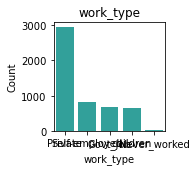

                   work_type  Count  Percent
Private              Private   2925    57.24
Self-employed  Self-employed    819    16.03
children            Govt_job    687    13.44
Govt_job            children    657    12.86
Never_worked    Never_worked     22     0.43
_________________________________________________________________


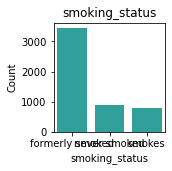

                  smoking_status  Count  Percent
never smoked     formerly smoked   3436    67.24
formerly smoked     never smoked    885    17.32
smokes                    smokes    789    15.44
_________________________________________________________________


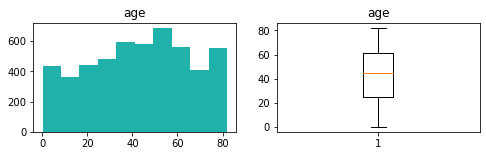

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


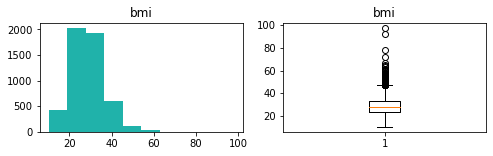

count    5110.000000
mean       28.941370
std         7.767288
min        10.300000
25%        23.700000
50%        28.200000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64


In [17]:
# explore univariate information. 
ex.explore_univariate(df, cat_cols, quant_cols)

# Univariate Takeaways

- Age is pretty even across the board
- Most work is in private sector
- Avg. glucose and bmi have a right skew, I assume they are related

In [18]:
# Split data
train, validate, test = w.train_validate_test_split(df, target, 42)

In [19]:
# Scale data
train, validate, test = w.train_validate_test_scale(train, validate, test, quant_cols)

hypertension 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=322168.0, pvalue=1.2567006838996058e-10)
        chi2       p-value  degrees of freedom
0  39.508251  3.266762e-10                   1

expected:
              0           1
0  2462.263544  125.736456
1   259.736456   13.263544


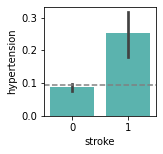


_____________________

heart_disease 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=184810.0, pvalue=1.9726071753895014e-10)
       chi2       p-value  degrees of freedom
0  38.09415  6.741193e-10                   1

expected:
              0           1
0  2575.481999  131.518001
1   146.518001    7.481999


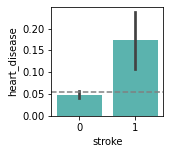


_____________________

ever_married 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=876508.0, pvalue=2.494285590593184e-07)
        chi2       p-value  degrees of freedom
0  25.676779  4.036550e-07                   1

expected:
              0          1
0   921.921706  47.078294
1  1800.078294  91.921706


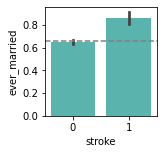


_____________________

rural_residence 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=1031107.0, pvalue=0.3031142684141561)
       chi2   p-value  degrees of freedom
0  0.889322  0.345661                   1

expected:
              0          1
0  1391.921007  71.078993
1  1330.078993  67.921007


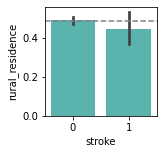


_____________________

urban_residence 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=1014167.0, pvalue=0.3031142684141561)
       chi2   p-value  degrees of freedom
0  0.889322  0.345661                   1

expected:
              0          1
0  1330.078993  67.921007
1  1391.921007  71.078993


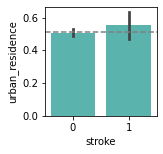


_____________________

current_smoker 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=528868.0, pvalue=0.5273624467863935)
       chi2   p-value  degrees of freedom
0  0.261846  0.608855                   1

expected:
              0           1
0  2303.377141  117.622859
1   418.622859   21.377141


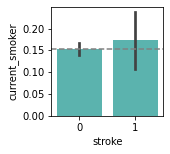


_____________________

is_female 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=985256.0, pvalue=0.9769279145242019)
       chi2   p-value  degrees of freedom
0  0.003554  0.952461                   1

expected:
              0          1
0  1099.836421  56.163579
1  1622.163579  82.836421


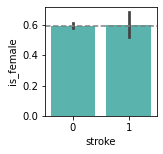


_____________________

is_male 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=985379.5, pvalue=0.983791788944853)
       chi2   p-value  degrees of freedom
0  0.004656  0.945598                   1

expected:
              0          1
0  1623.114995  82.885005
1  1098.885005  56.114995


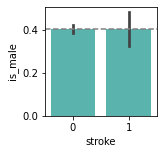


_____________________

age 
____________________



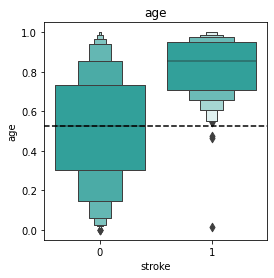

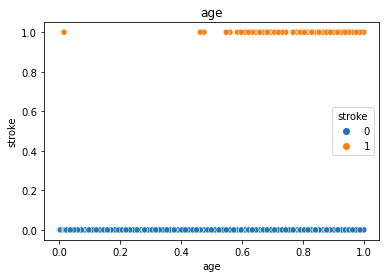

stroke            0           1
count   2722.000000  139.000000
mean       0.512886    0.822104
std        0.273150    0.151833
min        0.000000    0.015137
25%        0.304199    0.707031
50%        0.523926    0.853516
75%        0.731445    0.951172
max        1.000000    1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.24606603601358915, pvalue=1.0100123454668368e-40)

____________________

bmi 
____________________



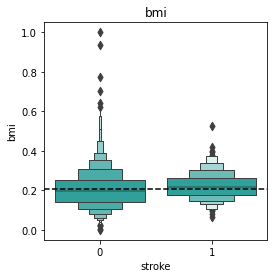

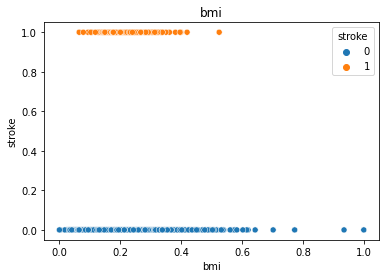

stroke            0           1
count   2722.000000  139.000000
mean       0.205051    0.222965
std        0.093733    0.071975
min        0.000000    0.064890
25%        0.142526    0.175261
50%        0.194670    0.215527
75%        0.253766    0.261877
max        1.000000    0.524913 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.0592534692417689, pvalue=0.001520358005297463)

____________________



In [20]:
# explore each variable against the target variable
ex.explore_bivariate(train, target, target, bin_cols, quant_cols)

# Bivariate takeaways

- Good features:
    - hypertension
    - heart disease
    - ever married
    - age
    - glucose
- Bad features:
    - residency
    - gender
    - current smoker
- Need more info:
    - bmi
    - ever_smoked...
   

<AxesSubplot:xlabel='work_type', ylabel='count'>

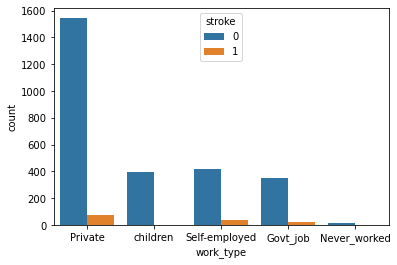

In [28]:
# Wanted to get a closer look at work_type relationship with stroke
sns.countplot(data=train, x='work_type', hue='stroke')

# Private sector had the highest number of strokes
# however that is most likely due to that larger number of 
# private sector workers

## Work_type and Stroke

- Wanted to get a closer look at work_type relationship with stroke.
    - Private sector had the highest number of strokes, however, that is most likely due to that larger number of private sector workers.

# Statistical Analysis

### χ<sup>2</sup> Test

The χ<sup>2</sup> test allows me to test for independence of 2 categorical variables.

### Confidence 

- Confidence level will be 99%
- Alpha will be 0.01 
- p-value must be below 0.01 to be statistically sigificant

### Hypothesis
- The null hypothesis (H<sub>0</sub>) is: hypertension is independent from stroke
- The alternate hypothesis (H<sub>1</sub>) is: hypertension and stroke are dependent

In [21]:
ex.chi2(train, 'hypertension', 'stroke', 0.01)

Observed

[[2484  104]
 [ 238   35]]
---
Expected

[[2462.26354422  125.73645578]
 [ 259.73645578   13.26354422]]
---

chi^2 = 39.5083
p     = 0.0000

Becasue the p-value: 0.0 is less than alpha: 0.01, we can reject the null hypothesis


### Hypothesis
- H<sub>0</sub> is: heart diease is independent from stroke
- H<sub>1</sub> is: heart disease and stroke are dependent

In [22]:
ex.chi2(train, 'heart_disease', 'stroke', 0.01)

Observed

[[2592  115]
 [ 130   24]]
---
Expected

[[2575.4819993  131.5180007]
 [ 146.5180007    7.4819993]]
---

chi^2 = 38.0942
p     = 0.0000

Becasue the p-value: 0.0 is less than alpha: 0.01, we can reject the null hypothesis


### Hypothesis
- H<sub>0</sub> is: ever married is independent from stroke
- H<sub>1</sub> is: ever married and stroke are dependent

In [23]:
ex.chi2(train, 'ever_married', 'stroke', 0.01)

Observed

[[ 950   19]
 [1772  120]]
---
Expected

[[ 921.9217057   47.0782943]
 [1800.0782943   91.9217057]]
---

chi^2 = 25.6768
p     = 0.0000

Becasue the p-value: 0.0 is less than alpha: 0.01, we can reject the null hypothesis


### T-Test

- The T-test allows me to compare the means of 2 subgroups

### Confidence 

- Confidence level will be 99%
- Alpha will be 0.01 
- p-value must be below 0.01 to be statistically sigificant

### Hypothesis: Age of those who have had a stroke vs. the age of the those who have not had a stroke

#### Two Sample, One Tail T-test

- H<sub>0</sub> is: The age of those who have not had a stroke is equal to or higher than the age of those who have had a stroke.
- H<sub>1</sub> is: The age of those who have not had a stroke is significantly less than the age of those who have had a stroke.

In [28]:
# population_1: Series of train.age column filtering out those who have NOT had a stroke.
age_no_stroke = train[train.stroke == 0].age

# population_2: Series of train.age column filtering out those who have had a stroke
age_stroke = train[train.stroke == 1].age

<AxesSubplot:xlabel='stroke', ylabel='age'>

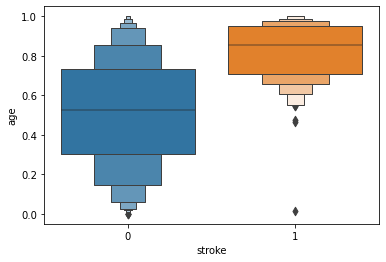

In [29]:
# Visual to explain why I think this would be a great feature
sns.boxenplot(data=train, y='age', x='stroke')

In [30]:
# Running a 2 sample, 1 tail, t-test, predicting that the age of 
# people who have not had a stroke is lower than those who have 
# had a stroke.

ex.t_test(age_no_stroke, age_stroke, 0.01, sample=2, tail=1, tail_dir='lower')

t-stat = -13.241
p     = 0.0

Because the p-value: 0.0 is less than alpha: 0.01 and the t-stat: -13.241 is less than 0, we reject the null hypothesis


### Hypothesis: Average glucose level of those who have had a stroke and the average glucose level of those who have not had a stroke.

#### Two Sample, Two Tail T-test

- H<sub>0</sub> is: there is no difference in the glucose levels of those who had a stroke and those who did not
- H<sub>1</sub> is: there is a significant difference in the gluclose levels of those who had a stroke and those who did not

In [31]:
# population_1: Series of train.avg_glucose_level filtering for those WITHOUT a stroke
gluc_no_stroke = train[train.stroke == 0].avg_glucose_level

# population_2: Series of train.avg_glucose_level filtering for those WITH a stroke
gluc_stroke = train[train.stroke == 1].avg_glucose_level

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

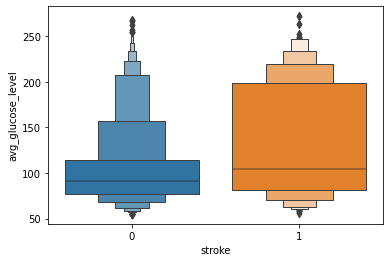

In [32]:
# Visual of avg_glucose_level and stroke
sns.boxenplot(data=train, y='avg_glucose_level', x='stroke')

In [33]:
# Running a 2 sample, 2 tail, t-test, predicting that the average glucose
# level of people who have not had a stroke is sigificantly different than 
# those who have had a stroke.

ex.t_test(gluc_no_stroke, gluc_stroke, 0.01, sample=2)

t-stat = -7.0421
p     = 0.0

Because the p-value: 0.0 is less than the alpha: 0.01, we reject the null hypothesis


## Statistical Summary

### χ<sup>2</sup> Results
- heart_disease, hypertension, and ever_married all rejected the null hypothesis
- It is now assumed that there is a dependency of each variable and stroke.

### T-test Results
- a two sample one tail t-test was performed on age of those who had a stroke and those who did not have a stroke.
- the null hypothesis was rejected.
- the t-test proved that the age of those who have not had a stroke was significantly less than the age of those who have had a stroke.

- a two sample two tail t-test was performed on average glucose levels of those who had a stroke and those who did not have a stroke.
- the null hypothesis was rejected.

# Modeling: Classification

### What am I looking for?
- In these models I will be looking to the ones that produce the highest Recall or Sensitivity. 
- I need the model that produce as many True Positives are False Negatives as possible. 
- Accuracy in this case will not produce the best predictions since it will not capture most people who will have a stroke.

In [34]:
X_train = train.drop(columns=['stroke'])
y_train = train.stroke

X_validate = validate.drop(columns=['stroke'])
y_validate = validate.stroke

X_test = test.drop(columns=['stroke'])
y_test = test.stroke

In [35]:
# create list of features that will be used for modeling.
features = ['hypertension', 'heart_disease', 'ever_married', 'age_bin', 'gluc_bin']

### Baseline

In [36]:
# find out the mode of the target variable
train.stroke.value_counts()

0    2722
1     139
Name: stroke, dtype: int64

In [37]:
# Establish new column that contains the mode
train["most_frequent"] = 0

# Calcuate the baseline accuracy
baseline_accuracy = (train.stroke == train.most_frequent).mean()
print(f'My baseline prediction is survived = 0')
print(f'My baseline accuracy is: {baseline_accuracy:.2%}')

My baseline prediction is survived = 0
My baseline accuracy is: 95.14%


### Model Selection Tools
- During this project I stumbled upon some helpful tool in selecting the hyperparameters for each model. 
- This tool is the GridSearchCV from sklearn.model_selection. 
    - This tool takes in a model, a dictionary of parameters, and a scoring parameter.
    - With a for loop it is easy to see what this tool does

In [39]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

In [40]:
# Create a parameter dictionary for the model, {'parameter': [list of settings]}
parameters = [
    {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['distance'],
    },
]
# Created variable model which holds the KNN model
model = KNeighborsClassifier()

# Create grid_search model, looking at recall
grid_search = GridSearchCV(model,
                           param_grid=parameters,
                           cv=5,
                           scoring='recall',
                           )

# Create variable r that hold the FIT grid_search
r = grid_search.fit(X_train[features], y_train)
scores = r.cv_results_
knn = r.best_estimator_


In [41]:
# Returns max value of the mean test score 
max(scores['mean_test_score'])

0.19417989417989417

In [62]:
# loop that runs all of the possible parameter configurations from the parameter dictionary above
for mean_score, params in sorted(list(zip(scores["mean_test_score"], scores["params"])),key = lambda x: x[0]):
     print(mean_score, params)

0.014285714285714285 {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
0.014285714285714285 {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'distance'}
0.014285714285714285 {'algorithm': 'kd_tree', 'n_neighbors': 9, 'weights': 'distance'}
0.02142857142857143 {'algorithm': 'brute', 'n_neighbors': 9, 'weights': 'distance'}
0.02857142857142857 {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
0.02857142857142857 {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
0.02857142857142857 {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
0.02857142857142857 {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}
0.02857142857142857 {'algorithm': 'kd_tree', 'n_neighbors': 5, 'weights': 'distance'}
0.02857142857142857 {'algorithm': 'kd_tree', 'n_neighbors': 7, 'weights': 'distance'}
0.028835978835978836 {'algorithm': 'brute', 'n_neighbors': 7, 'weights': 'distance'}
0.03571428571428571 {'algorithm': 'brute', 'n_neighbors':

### Model 1: K Nearest Neighbors

In [43]:
# Create the model
n_neighbors = 1
knn = KNeighborsClassifier(algorithm='brute', n_neighbors=n_neighbors, weights='distance')

# Fit the model with the train data
knn.fit(X_train[features], y_train)

# Predict the target
y_pred_knn = knn.predict(X_train[features])

# predict the probability
y_pred_proba_knn = knn.predict_proba(X_train[features])

In [44]:
# Create confusion matrix, label true positive, true negative, false positive, false negative
[tn,fp],[fn, tp] = confusion_matrix(y_train, y_pred_knn)

# Calculate the true positive rate, true negative rate, false positive rate, and false negative rate 
tpr = (tp / (tp+fn))
fnr = (fn / (fn+tp))
tnr = (tn / (tn+fp))
fpr = (fp / (tn+fp))

In [45]:
print(f'The confusion matrix:\n {confusion_matrix(y_train, y_pred_knn)}\n')
print(f'Classificaiton Report:\n{classification_report(y_train, y_pred_knn)}\n')
print(f'The True Positive Rate is: {tpr:.2%}')
print(f'The False Positive Rate is: {fpr:.2%}')
print(f'The True Negative Rate is: {tnr:.2%}')
print(f'The False Negative Rate is: {fnr:.2%}\n')
print('Accuracy of KNN classifier on training set n_neighbors set to 4: {:.2f}'
     .format(knn.score(X_train[features], y_train)))
print('Accuracy of KNN classifier on validate set with n_neighbors set to 4: {:.2f}\n'
     .format(knn.score(X_validate[features], y_validate)))

The confusion matrix:
 [[2436  286]
 [  99   40]]

Classificaiton Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      2722
           1       0.12      0.29      0.17       139

    accuracy                           0.87      2861
   macro avg       0.54      0.59      0.55      2861
weighted avg       0.92      0.87      0.89      2861


The True Positive Rate is: 28.78%
The False Positive Rate is: 10.51%
The True Negative Rate is: 89.49%
The False Negative Rate is: 71.22%

Accuracy of KNN classifier on training set n_neighbors set to 4: 0.87
Accuracy of KNN classifier on validate set with n_neighbors set to 4: 0.85



### Model 2: Random Forest

In [46]:
# create the random forest model
rf = RandomForestClassifier(bootstrap=True, 
                            n_estimators=50,
                            warm_start=True,
                            oob_score=True,
                            criterion='gini', 
                            random_state=42)

In [47]:
# fit the model with X_train
rf.fit(X_train[features], y_train)

# Predict the target
y_pred_rf = rf.predict(X_train[features])

# predict the probability
y_pred_proba_rf = rf.predict_proba(X_train[features])

In [48]:
# Create confusion matrix, label true positive, true negative, false positive, false negative
[tn,fp],[fn, tp] = confusion_matrix(y_train, y_pred_rf)

# Calculate the true positive rate, true negative rate, false positive rate, and false negative rate 
tpr = (tp / (tp+fn))
fnr = (fn / (fn+tp))
tnr = (tn / (tn+fp))
fpr = (fp / (tn+fp))

In [49]:
print(f'\nThe confusion matrix:\n {confusion_matrix(y_train, y_pred_rf)}\n')
print(f'Classificaiton Report:\n{classification_report(y_train, y_pred_rf)}\n')
print(f'The True Positive Rate is: {tpr:.2%}')
print(f'The False Positive Rate is: {fpr:.2%}')
print(f'The True Negative Rate is: {tnr:.2%}')
print(f'The False Negative Rate is: {fnr:.2%}\n')
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train[features], y_train)))
print('Accuracy of random forest classifier on the validate set: {:.2f}'
     .format(rf.score(X_validate[features], y_validate)))


The confusion matrix:
 [[2714    8]
 [ 124   15]]

Classificaiton Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2722
           1       0.65      0.11      0.19       139

    accuracy                           0.95      2861
   macro avg       0.80      0.55      0.58      2861
weighted avg       0.94      0.95      0.94      2861


The True Positive Rate is: 10.79%
The False Positive Rate is: 0.29%
The True Negative Rate is: 99.71%
The False Negative Rate is: 89.21%

Accuracy of random forest classifier on training set: 0.95
Accuracy of random forest classifier on the validate set: 0.95


### Model 3: Decision Tree

In [50]:
# Create decision tree model
clf = DecisionTreeClassifier(max_depth=7, splitter='random', random_state=42)

In [51]:
# fit the model
clf = clf.fit(X_train[features], y_train)

# predict the target
y_pred_clf = clf.predict(X_train[features])

# predict the probability
y_pred_proba_clf = clf.predict_proba(X_train[features])

In [52]:
# Create confusion matrix, label true positive, true negative, false positive, false negative
[tn,fp],[fn, tp] = confusion_matrix(y_train, y_pred_clf)

# Calculate the true positive rate, true negative rate, false positive rate, and false negative rate 
tpr = (tp / (tp+fn))
fnr = (fn / (fn+tp))
tnr = (tn / (tn+fp))
fpr = (fp / (tn+fp))

In [53]:
print(f'The confusion matrix:\n {confusion_matrix(y_train, y_pred_clf)}\n')
print(f'Classificaiton Report:\n {classification_report(y_train, y_pred_clf)}')
print(f'The True Positive Rate is: {tpr:.2%}')
print(f'The False Positive Rate is: {fpr:.2%}')
print(f'The True Negative Rate is: {tnr:.2%}')
print(f'The False Negative Rate is: {fnr:.2%}\n')
print('Accuracy of Decision Tree classifier on training set: {:.2f}\n'
      .format(clf.score(X_train[features], y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate[features], y_validate)))

The confusion matrix:
 [[2721    1]
 [ 132    7]]

Classificaiton Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      2722
           1       0.88      0.05      0.10       139

    accuracy                           0.95      2861
   macro avg       0.91      0.52      0.54      2861
weighted avg       0.95      0.95      0.93      2861

The True Positive Rate is: 5.04%
The False Positive Rate is: 0.04%
The True Negative Rate is: 99.96%
The False Negative Rate is: 94.96%

Accuracy of Decision Tree classifier on training set: 0.95

Accuracy of Decision Tree classifier on validate set: 0.95


### Model 4: Logistic Regression

In [54]:
logit = LogisticRegression(penalty='l2', C=1, class_weight={0: 10, 1: 90}, random_state=42, solver='lbfgs')

In [55]:
logit.fit(X_train[features], y_train)

LogisticRegression(C=1, class_weight={0: 10, 1: 90}, random_state=42)

In [56]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 4.89582109e-01  1.02402118e-01 -2.80644637e-01  7.03113077e+00
   5.37288473e-03]]
Intercept: 
 [-4.73706865]


In [57]:
# predict the target
y_pred_log = logit.predict(X_train[features])

# predict the probability
y_pred_proba_log = logit.predict_proba(X_train[features])

In [58]:
# Create confusion matrix, label true positive, true negative, false positive, false negative
[tn,fp],[fn, tp] = confusion_matrix(y_train, y_pred_log)

# Calculate the true positive rate, true negative rate, false positive rate, and false negative rate 
tpr = (tp / (tp+fn))
fnr = (fn / (fn+tp))
tnr = (tn / (tn+fp))
fpr = (fp / (tn+fp))

In [ ]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}\n'
     .format(logit.score(X_train[features], y_train)))
print(f'The confusion matrix:\n {confusion_matrix(y_train, y_pred_log)}\n')
print(f'Classificaiton Report:\n {classification_report(y_train, y_pred_log)}\n')
print(f'The True Positive Rate is: {tpr:.2%}')
print(f'The False Positive Rate is: {fpr:.2%}')
print(f'The True Negative Rate is: {tnr:.2%}')
print(f'The False Negative Rate is: {fnr:.2%}\n')
print('Accuracy of on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))
print('Accuracy out-of-sample set: {:.2f}'.format(logit.score(X_validate[features], y_validate)))

# Testing the Model

### KNN Model had the best fit

- Hyperparameters:
    - algorithm='brute' 
    - n_neighbors=1
    - weights='distance'

In [64]:


print(f'My baseline accuracy is: {baseline_accuracy:.2%}\n')

print('Accuracy of on training set: {:.2f}'
     .format(knn.score(X_train[features], y_train)))
print('Accuracy out-of-sample validation set: {:.2f}'.format(knn.score(X_validate[features], y_validate)))
print('Accuracy out-of-sample test set: {:.2f}\n'.format(knn.score(X_test[features], y_test)))


print(f'The confusion matrix:\n {confusion_matrix(y_train, y_pred_knn)}\n')
print(f'Classificaiton Report:\n{classification_report(y_train, y_pred_knn)}\n')


My baseline accuracy is: 95.14%

Accuracy of on training set: 0.87
Accuracy out-of-sample validation set: 0.85
Accuracy out-of-sample test set: 0.84

The confusion matrix:
 [[2436  286]
 [  99   40]]

Classificaiton Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      2722
           1       0.12      0.29      0.17       139

    accuracy                           0.87      2861
   macro avg       0.54      0.59      0.55      2861
weighted avg       0.92      0.87      0.89      2861




# Model Summary
- My models performed pretty poorly
- The imbalanced data set did not provide enough Stroke positive people to analyze thus making it difficult to see what is happeneing

## Best Model
- Because Recall is the most important scoring metric, The KNN is the best performing model
- The downfall of recall being the most important metric for modeling is that the precision is generaly negatively affected. 
- Accuracy decreased from 95% to 84%, and the Recall achieved a 29%

# Conclusion

With the current dataset, predicting stroke is extremely difficult. When I completed modeling of this data, I realized that finding a really good solution is problematic for a couple reasons.
1. The dataset is far too small. If stroke is the worlds 2<sup>nd</sup> leading cause of death, there should be much more informaiton available. 
2. This dataset is far too imbalanced for a good machine learning algorithm to analyze.
    a. When imblearn is applied the dataset drops from 5000 records to 300. 

What can be done to make this project better?
Collect more stroke victim data, perhaps conducting a large study to gather more patients' data and more data points like family history, blood disorders, etc.